In [ ]:
# initial data visualization, for the first couple of million objects ordered by random_index.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import healpy as hp

import astropy.cosmology
cosmo = astropy.cosmology.FlatLambdaCDM(H0=70, Om0 = 0.3)

import astropy.coordinates as coord
import astropy.units as u

In [31]:
!ls -lh ../data

total 1.7G
-rw-rw-r-- 1 kiyer kiyer 853M May  9 11:19 first_million_random_index.csv
-rw-rw-r-- 1 kiyer kiyer 854M May  9 11:47 second_million_random_index.csv


In [6]:
# import the data into a pandas DataFrame

gaia_dr2_firstmil_sample = pd.read_csv('../data/first_million_random_index.csv', low_memory=False)

/home/kiyer/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# lets print the table:

gaia_dr2_firstmil_sample

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
0,1635721458409799680,Gaia DR2 4205572950572486656,4205572950572486656,0,2015.5,284.997397,0.320213,-7.213794,0.250722,0.336854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
1,1635721458409799680,Gaia DR2 4205565597589384320,4205565597589384320,1,2015.5,285.403309,0.107384,-7.148584,0.102720,0.245811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
2,1635721458409799680,Gaia DR2 4053206649305182080,4053206649305182080,2,2015.5,275.626769,0.910609,-25.133812,0.668263,1.052592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
3,1635721458409799680,Gaia DR2 4205568964799943680,4205568964799943680,3,2015.5,285.346380,1.255121,-7.110390,1.028153,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
4,1635721458409799680,Gaia DR2 4049398731303340416,4049398731303340416,4,2015.5,274.009409,0.349221,-30.525125,0.348200,0.259290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
5,1635721458409799680,Gaia DR2 4053206924184153472,4053206924184153472,5,2015.5,275.737952,0.507891,-25.143911,0.479283,-1.449786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
6,1635721458409799680,Gaia DR2 2944217403015932032,2944217403015932032,6,2015.5,96.875156,7.564588,-15.996720,8.709176,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
7,1635721458409799680,Gaia DR2 4205572263340546688,4205572263340546688,7,2015.5,284.957509,9.238430,-7.214939,7.507561,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
8,1635721458409799680,Gaia DR2 5889059805439854848,5889059805439854848,8,2015.5,234.271140,0.053783,-52.218658,0.039851,0.231855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
9,1635721458409799680,Gaia DR2 4049398765669294976,4049398765669294976,9,2015.5,274.018619,1.001264,-30.513203,3.031450,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN


In [8]:
# list all the column names:

gaia_dr2_firstmil_sample.dtypes.index

Index(['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error',
       'mean_varpi_factor_al', 'astrometric_matched_observations',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'frame_rotator_object_type',

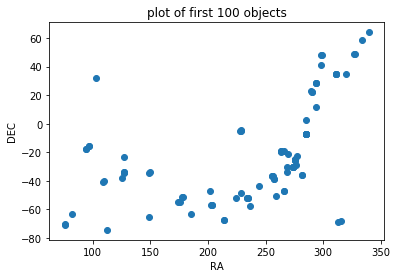

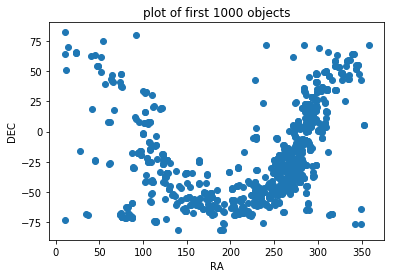

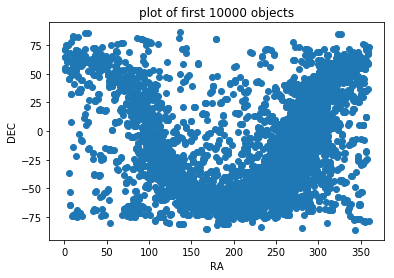

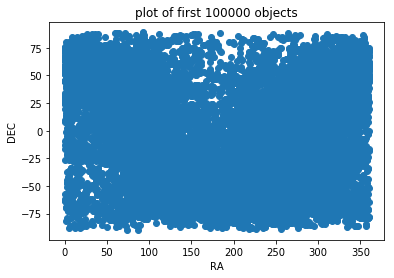

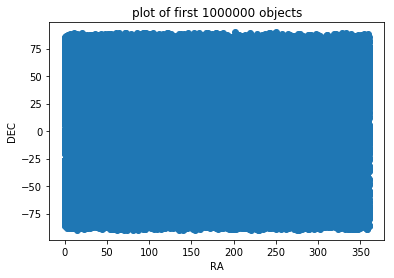

In [15]:
# rough idea of coverage

ra_vals = gaia_dr2_firstmil_sample['ra']
dec_vals = gaia_dr2_firstmil_sample['dec']

ng = 100
plt.scatter(ra_vals[0:ng], dec_vals[0:ng])
plt.title('plot of first %s objects' %ng); plt.xlabel('RA'); plt.ylabel('DEC');
plt.show()

ng = 1000
plt.scatter(ra_vals[0:ng], dec_vals[0:ng])
plt.title('plot of first %s objects' %ng); plt.xlabel('RA'); plt.ylabel('DEC');
plt.show()

ng = 10000
plt.scatter(ra_vals[0:ng], dec_vals[0:ng])
plt.title('plot of first %s objects' %ng); plt.xlabel('RA'); plt.ylabel('DEC');
plt.show()

ng = 100000
plt.scatter(ra_vals[0:ng], dec_vals[0:ng])
plt.title('plot of first %s objects' %ng); plt.xlabel('RA'); plt.ylabel('DEC');
plt.show()

ng = 1000000
plt.scatter(ra_vals[0:ng], dec_vals[0:ng])
plt.title('plot of first %s objects' %ng); plt.xlabel('RA'); plt.ylabel('DEC');
plt.show()

In [ ]:
# making better looking plots

ra_vals = gaia_dr2_firstmil_sample['ra']
dec_vals = gaia_dr2_firstmil_sample['dec']

ng = 100000

ra_rad = coord.Angle((ra_vals[0:ng] - 180)*u.degree)
dec_rad = coord.Angle(dec_vals[0:ng]*u.degree)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection = 'mollweide')
ax.scatter(ra_rad.radian, dec_rad.radian)
plt.title('same plot as before, mollweide projected')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()